In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
erangel_kill = pd.read_csv('kill_dist_weap_class.csv')

In [3]:
erangel_kill

,time,killed_by,kill_distance,weapon_class
0,311,P92,4.300893,shotgun_pistol
1,157,S1897,3.175474,shotgun_pistol
2,158,P1911,2.619527,shotgun_pistol
3,180,S686,7.123033,shotgun_pistol
4,1109,S12K,2.475817,shotgun_pistol
...,...,...,...,...
960531,1074,Kar98k,42.128012,sniper
960532,1285,M249,35.848993,sniper
960533,838,SKS,44.025749,sniper
960534,1072,M24,23.419412,sniper


--- 
 
 
# Random Forest Classification for Sniper Kills
 
> #### One of the main problems faced is that our team isconstantly getting killed by snipers! Which causes us to die extremely fast
>We can use random forrest to determine chances of getting engaged by a sniper player, at what distance
> 
>> We use the data visualized in `kill_dist_weap_class.csv` from [2_kill_distance_weapon_type](https://github.com/Gyanroh/SC1015_PUBG_Project/blob/main/3_Map_%26_General_Visualization/2_kill_distance_weapon_type.ipynb)
>><br>First, we classify data into two categories, `sniper` and `close-range`

In [10]:
erangel_kill['weapon_class'].replace('shotgun_pistol', 'close-range', inplace=True)
erangel_kill['weapon_class'].replace('smg', 'close-range', inplace=True)
erangel_kill['weapon_class'].replace('rifle', 'close-range', inplace=True)



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8675947595925608

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8670200804550793



<AxesSubplot:>

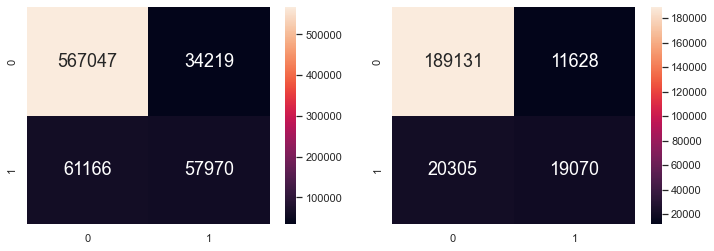

In [15]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(erangel_kill['weapon_class'])   # Response
total = pd.DataFrame(erangel_kill['kill_distance'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1339.2, 2348.3520000000003, 'Distance <= 29.612\ngini = 0.276\nsamples = 720402\nvalue = [601266, 119136]\nclass = Other'),
 Text(669.6, 1826.496, 'Distance <= 19.058\ngini = 0.113\nsamples = 562684\nvalue = [528813, 33871]\nclass = Other'),
 Text(334.8, 1304.6400000000003, 'Distance <= 13.651\ngini = 0.076\nsamples = 489702\nvalue = [470372, 19330]\nclass = Other'),
 Text(167.4, 782.7840000000001, 'Distance <= 8.949\ngini = 0.062\nsamples = 422840\nvalue = [409197, 13643]\nclass = Other'),
 Text(83.7, 260.92800000000034, 'gini = 0.055\nsamples = 332278\nvalue = [322823, 9455]\nclass = Other'),
 Text(251.10000000000002, 260.92800000000034, 'gini = 0.088\nsamples = 90562\nvalue = [86374, 4188]\nclass = Other'),
 Text(502.20000000000005, 782.7840000000001, 'Distance <= 16.389\ngini = 0.156\nsamples = 66862\nvalue = [61175, 5687]\nclass = Other'),
 Text(418.5, 260.92800000000034, 'gini = 0.133\nsamples = 37616\nvalue = [34928, 2688]\nclass = Other'),
 Text(585.9, 260.92800000000034,

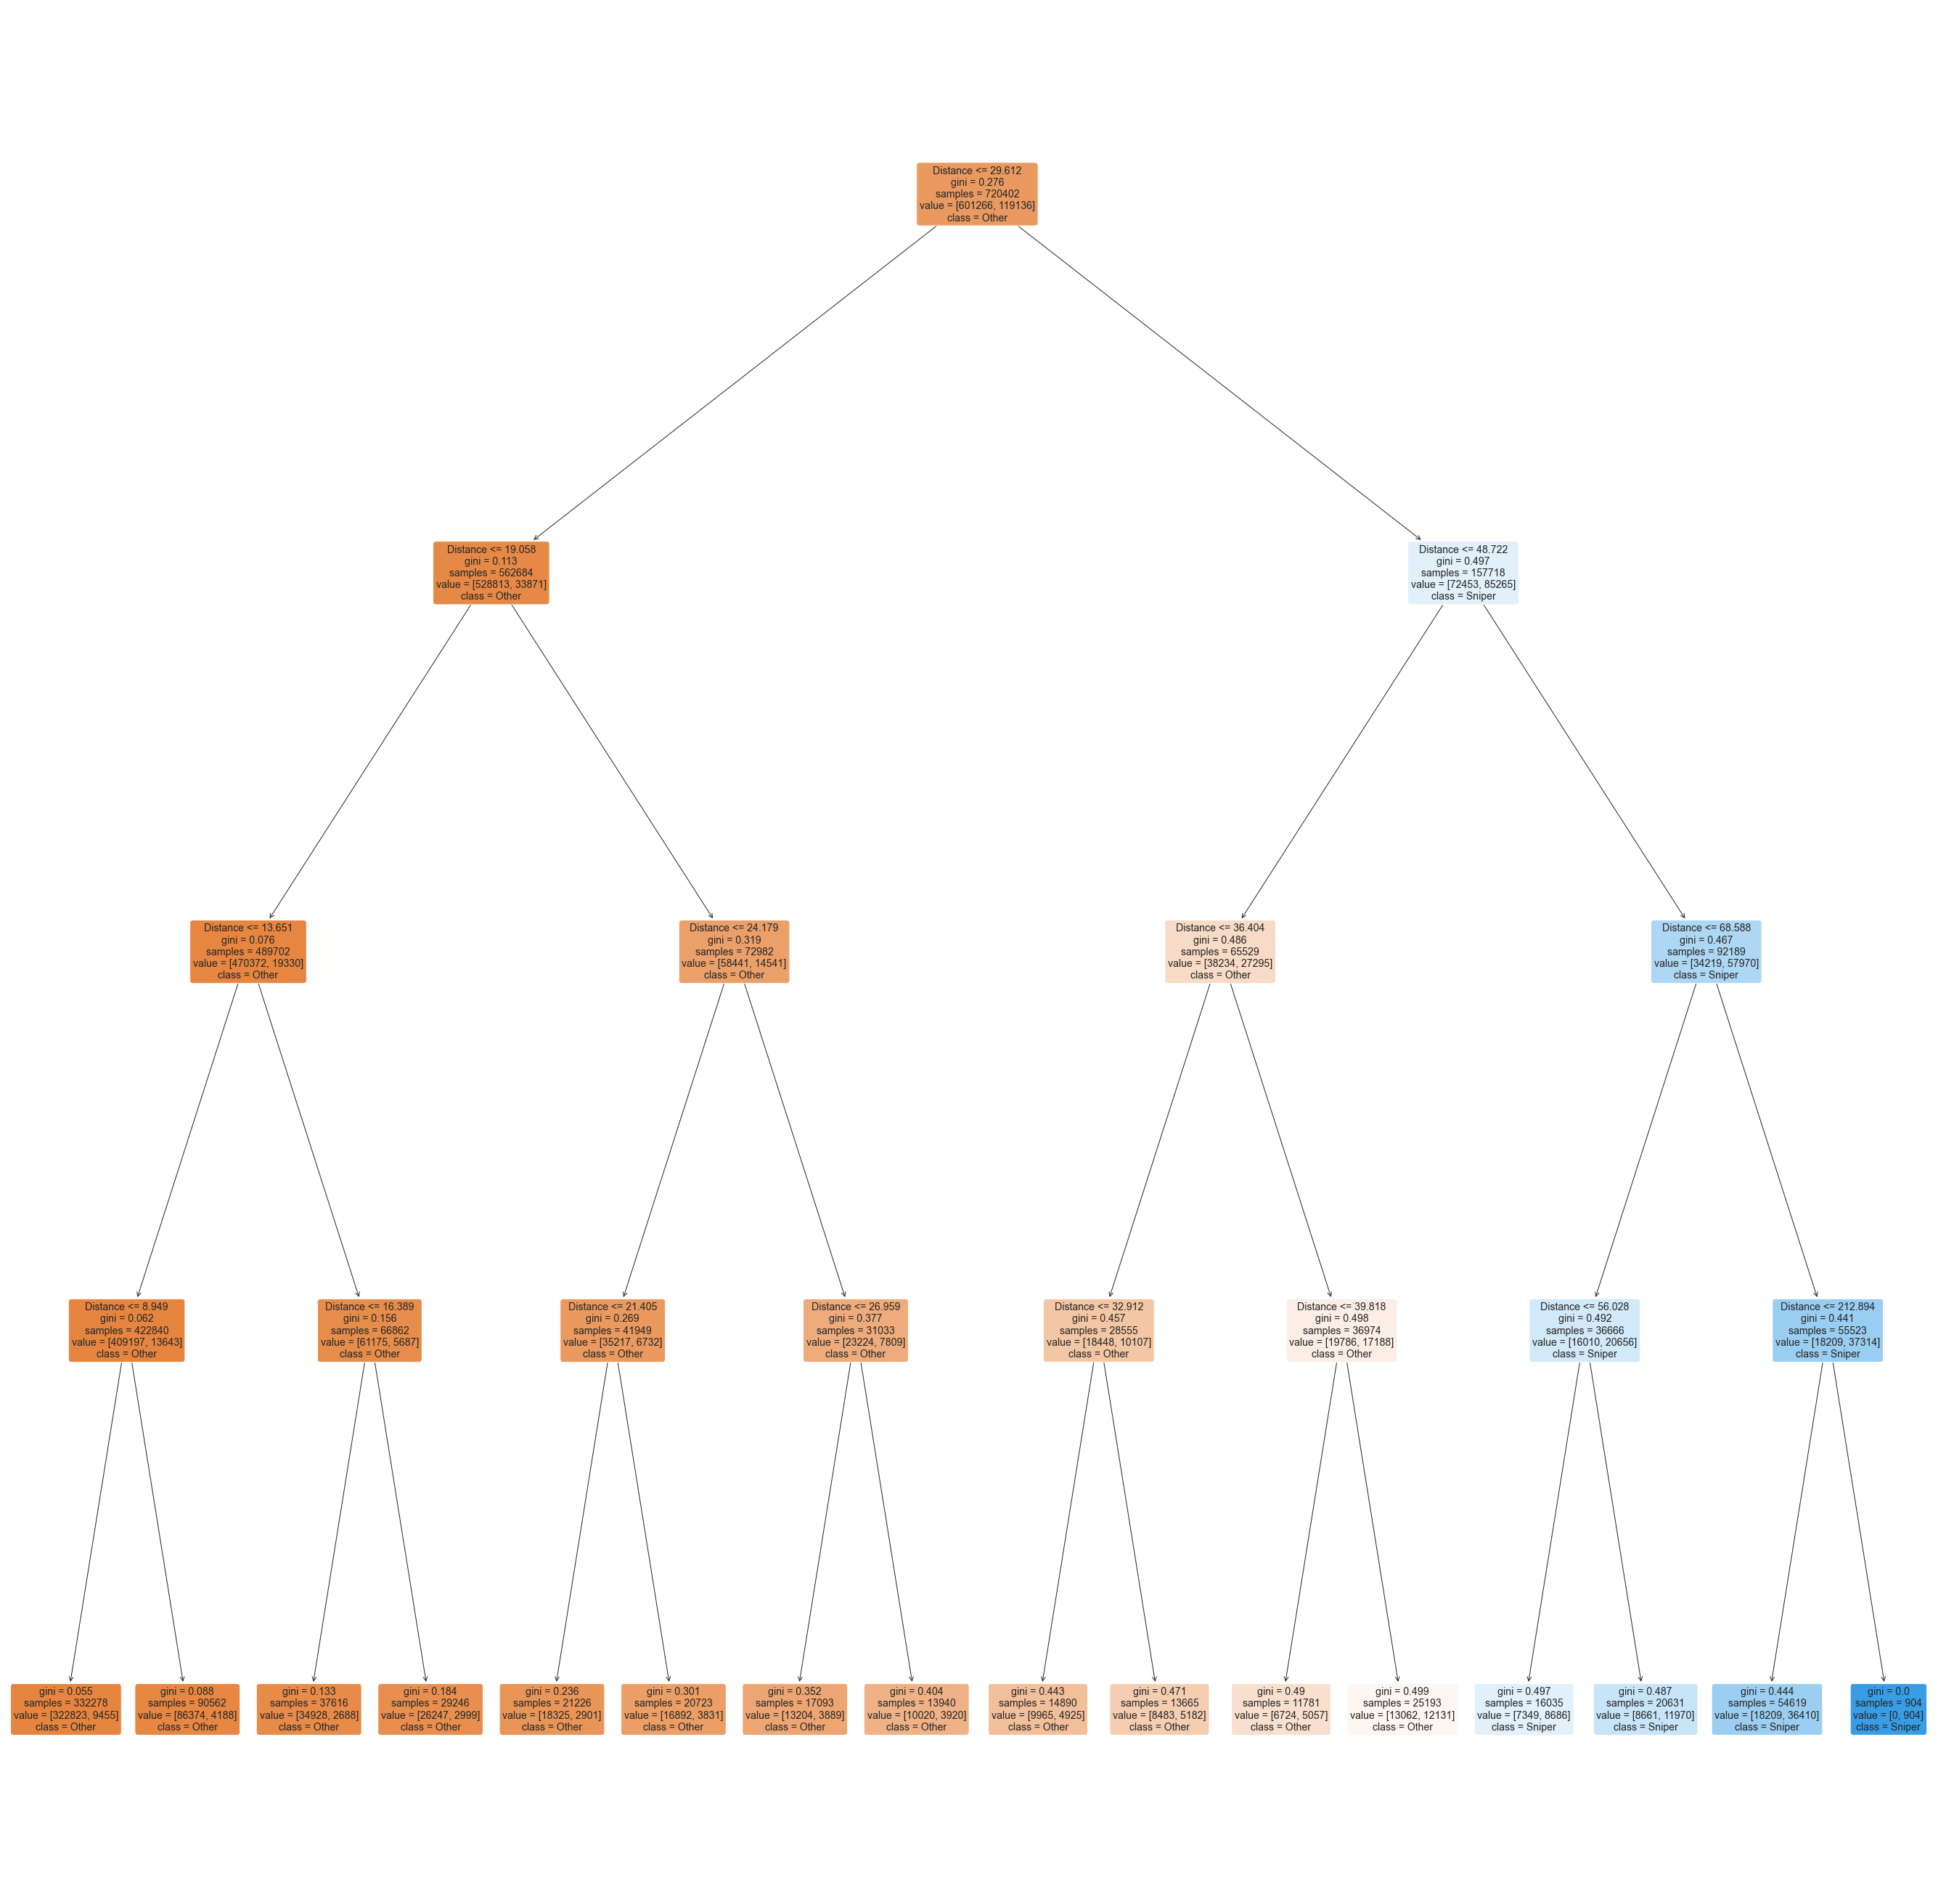

In [22]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(48,48))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Distance"], 
          class_names=["Other","Sniper"])

---


# Conclusion

>  After `39.818 meters`, we should start to be extremely careful about snipers. The gini coefficient is around `0.499`. <br>This means there is a `49.9% / 50.1%` chance that the player may be killed by a sniper rifle.
>
>At this distance, if you do not have proper armor, protection or methods to deal with snipers, do not expose yourself to sightlines beyond this length.
> ## Strictly keep inside buildings if you see enemy players at this distance!